# Student Information

Name: Virintorn Kantaravichaiwat

Student ID: 110065427

GitHub ID: sandvirin

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---
# Part 1

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration

### 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset. A short description of the dataset, provided by the authors

### 2. Data Preparation

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

## ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

### Adding Columns

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target

In [7]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### 3.2 Familiarizing yourself with the Data

## ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [65]:
#iloc by position
X.iloc[[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


## ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [19]:
X.loc[lambda f: f.category_name == 'comp.graphics'].iloc[::10, :][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
43,From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...,1,comp.graphics
76,From: sts@mfltd.co.uk (Steve Sherwood (x5543))...,1,comp.graphics
107,From: samson@prlhp1.prl.philips.co.uk (Mark Sa...,1,comp.graphics
172,From: thinman@netcom.com (Technically Sweet) S...,1,comp.graphics


### 4. Data Mining using Pandas

## >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [68]:
#give number of NaN values in every row, if col. use axis=0
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

## >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [69]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [70]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [71]:
# Answer here
#isnull check the value is string ('') type or not, if not will just as null value, but in this case, some value is string but the value is 'NaN' and 'None' so it justed wrong.

### 5.  Data Preprocessing

### 5.1 Sampling

In [72]:
X_sample = X.sample(n=1000) #random state

## >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [60]:
# Answer here
#1. Data Preparation Select Data only 4 categories
#2. Data Transformation: convert dictionary to Pandas dataframe
#    2.1 add col. 'category'
#    category to the dataframe
#    X['category'] = twenty_train.target
#    2.2 add col. 'category_name'
#    X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
#3. Missing Value
#    3.1 Add dummy missing value
#    dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
#    3.2 Drop dummy missing value
#    X.dropna(inplace=True)
#4. Duplicate Data
#    4.1 Add dummy duplicate data
#    dummy_duplicate_dict = [{
#                             'text': 'dummy record',
#                             'category': 1, 
#                             'category_name': "dummy category"
#                        },
#                        {
#                             'text': 'dummy record',
#                             'category': 1, 
#                             'category_name': "dummy category"
#                        }]
#    X = X.append(dummy_duplicate_dict, ignore_index=True)
#    4.2 Drop dummy duplicate value
#    X.drop_duplicates(keep=False, inplace=True)

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

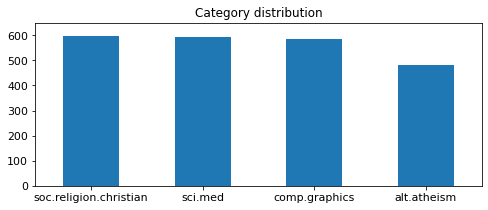

In [76]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   279
soc.religion.christian    260
comp.graphics             253
alt.atheism               208
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

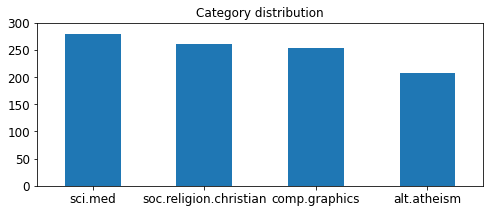

In [77]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

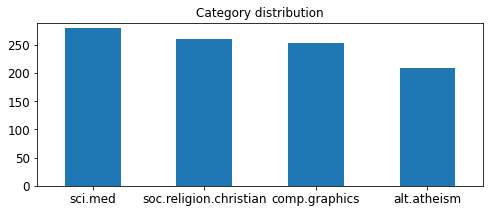

In [78]:
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                          title = 'Category distribution',
                                          ylim = [0, upper_bound],
                                          rot = 0, fontsize = 12, figsize = (8,3))

## >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
soc.religion.christian    273
comp.graphics             265
sci.med                   242
alt.atheism               220
Name: category_name, dtype: int64


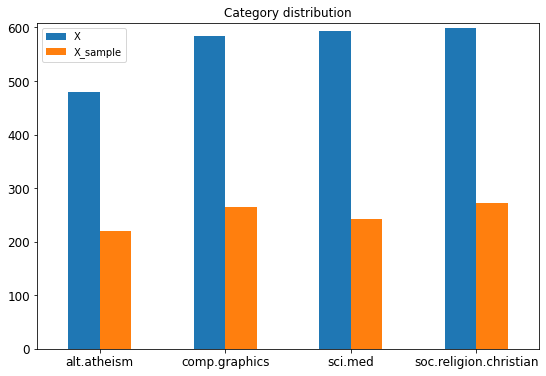

In [42]:
# Upper bound
upper_bound = max(X.category_name.value_counts()) + 10
# print data
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

# plot barchart
df = pd.DataFrame({'X': X.category_name.value_counts(),
                   'X_sample': X_sample.category_name.value_counts()})
ax = df.plot.bar(title = 'Category distribution',
                 ylim = [0, upper_bound],rot = 0, fontsize = 12,
                 figsize = (9,6))

### 5.2 Feature Creation

In [79]:
import nltk

In [80]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### 5.3 Feature subset selection

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [82]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

## **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [83]:
# Answer here
analyze(" ".join(list(X[0:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [85]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

## **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [86]:
# select 5th doc
doc5 = X_counts[0:5, 0:100].toarray()[4]

# find array = 1
result = np.where(doc5==1)[0][1]

# result of '1'
count_vect.get_feature_names()[result]

'01'

## **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [92]:
# finding which #sentence and term (#word) has correlation
maxx =np.argwhere(X_counts[0:,0:]>50)
print(maxx)

[[  123  4566]
 [  123  4992]
 [  123 16679]
 [  123 17556]
 [  123 23610]
 [  123 32139]
 [  123 32142]
 [  123 32493]
 [  159 23610]
 [  159 32142]
 [  159 32493]
 [  178 32139]
 [  178 32142]
 [  178 32493]
 [  199 32142]
 [  200 32142]
 [  209 23610]
 [  209 32142]
 [  231 32142]
 [  289 32142]
 [  296 32142]
 [  312 32142]
 [  331 32142]
 [  348 32142]
 [  358 32142]
 [  385 32142]
 [  398 32142]
 [  400  4992]
 [  400  7766]
 [  400 10699]
 [  400 14601]
 [  400 14887]
 [  400 17556]
 [  400 18474]
 [  400 18551]
 [  400 23610]
 [  400 23733]
 [  400 32142]
 [  400 32493]
 [  400 35638]
 [  424  4992]
 [  424  7781]
 [  424 23610]
 [  424 32142]
 [  424 32493]
 [  425 32142]
 [  432  4992]
 [  432 32142]
 [  433  4992]
 [  433  5410]
 [  433  5549]
 [  433  6298]
 [  433  7766]
 [  433  9045]
 [  433 14277]
 [  433 14601]
 [  433 14676]
 [  433 14887]
 [  433 15351]
 [  433 16254]
 [  433 17268]
 [  433 17356]
 [  433 17366]
 [  433 17556]
 [  433 18474]
 [  433 18551]
 [  433 18

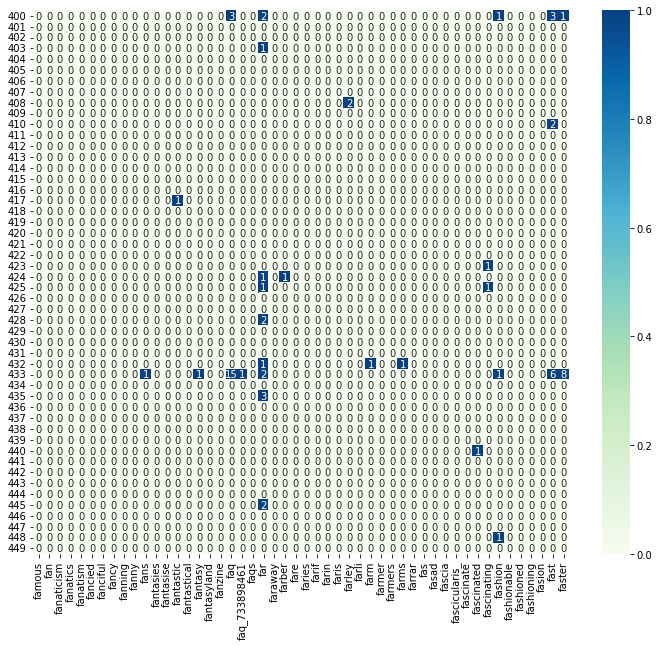

In [93]:
#get features first 40
plot_a = [str(i) for i in count_vect.get_feature_names()[14000:14050]]

# obtain document 40
plot_b = [str(i) for i in list(X.index)[400:450]]

plot_c = X_counts[400:450, 14000:14050].toarray()

#plot 40 documents
import seaborn as sns

df_todraw = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="GnBu",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [94]:
from sklearn.decomposition import PCA

In [95]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

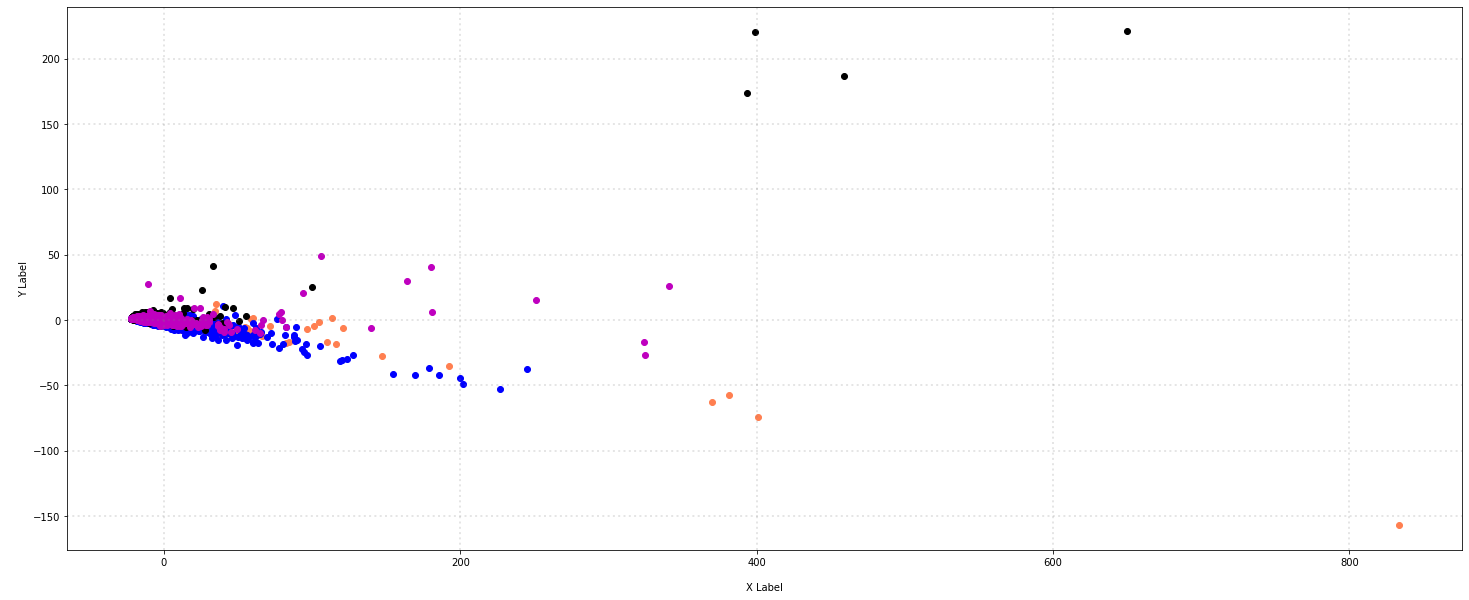

In [98]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

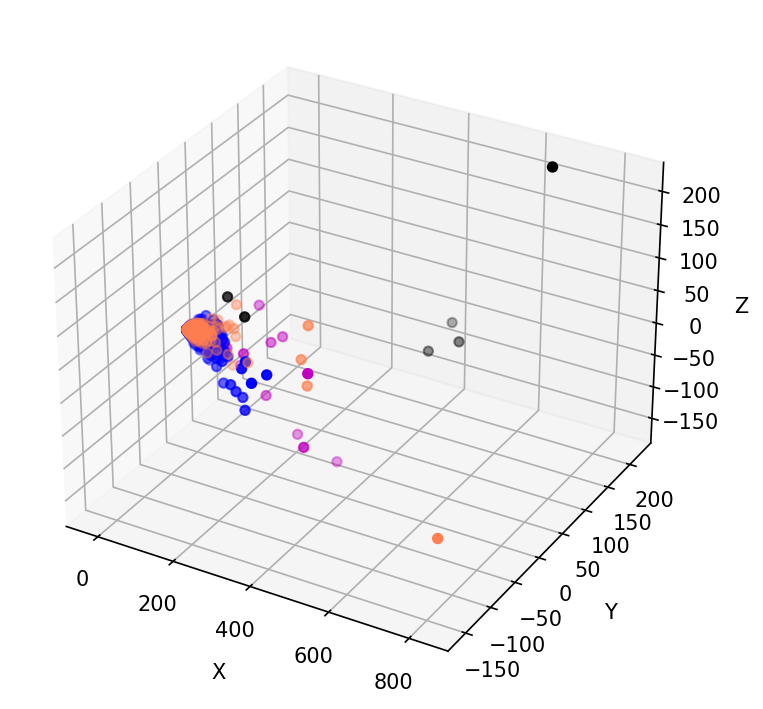

In [99]:
X_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
#set up size
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 150

# make a Axes3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_3d[X['category_name'] == category].T[0]
    ys = X_3d[X['category_name'] == category].T[1]
    zs = X_3d[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='grey', linestyle=':', linewidth=1, alpha=0.2)
ax.set_xlabel('\nX')
ax.set_ylabel('\nY')
ax.set_zlabel('\nZ')

plt.show()

### 5.5 Atrribute Transformation / Aggregation

In [100]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [101]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

## >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

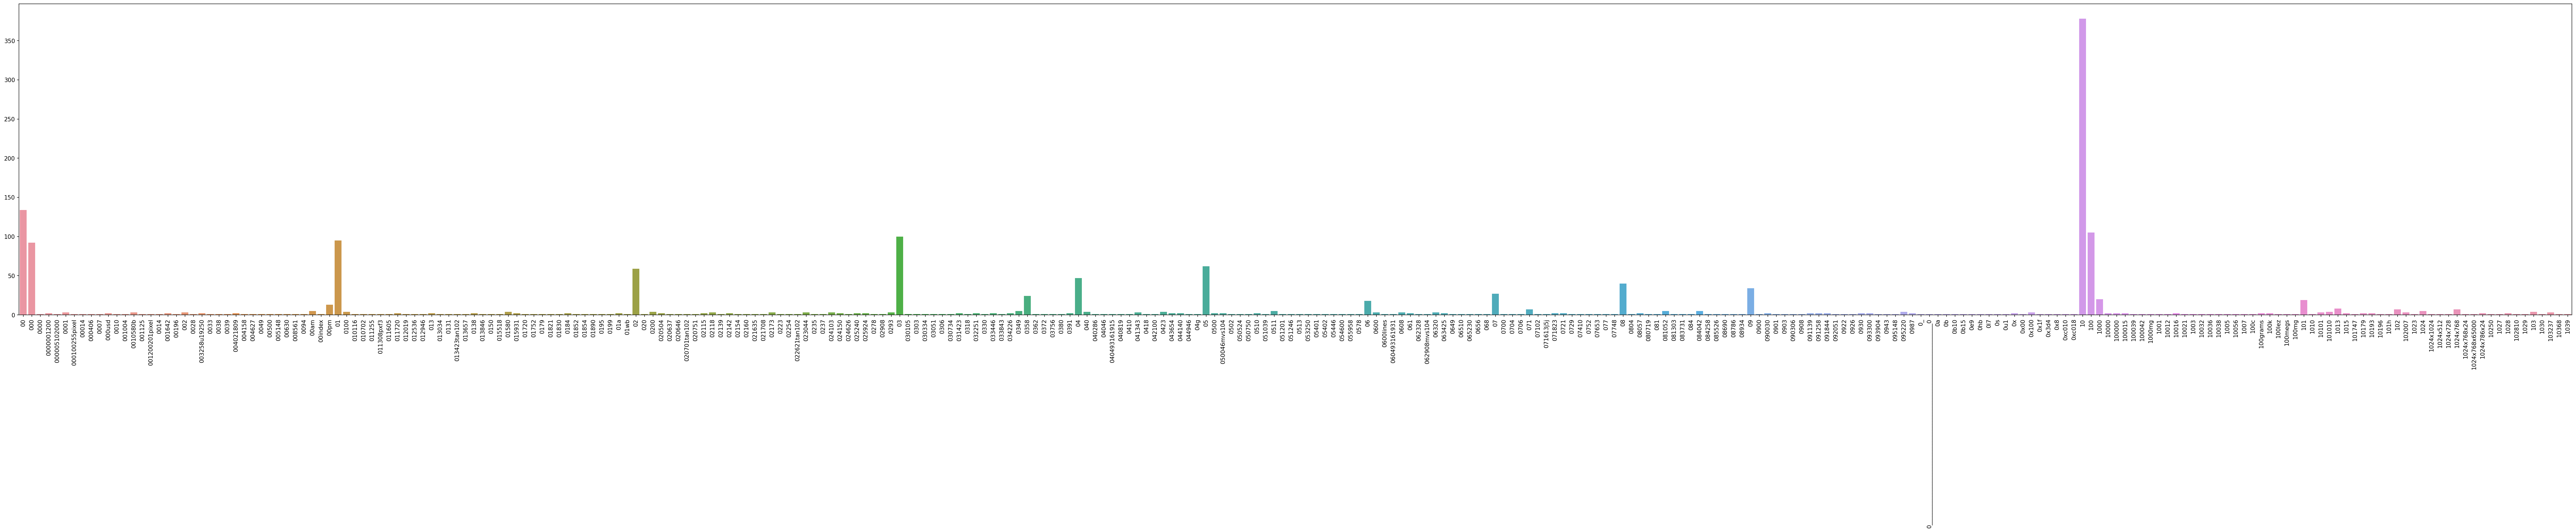

In [104]:
#using matplotlib
#pls use this one %matplotlib notebook
#set up size
plt.subplots(figsize=(80, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


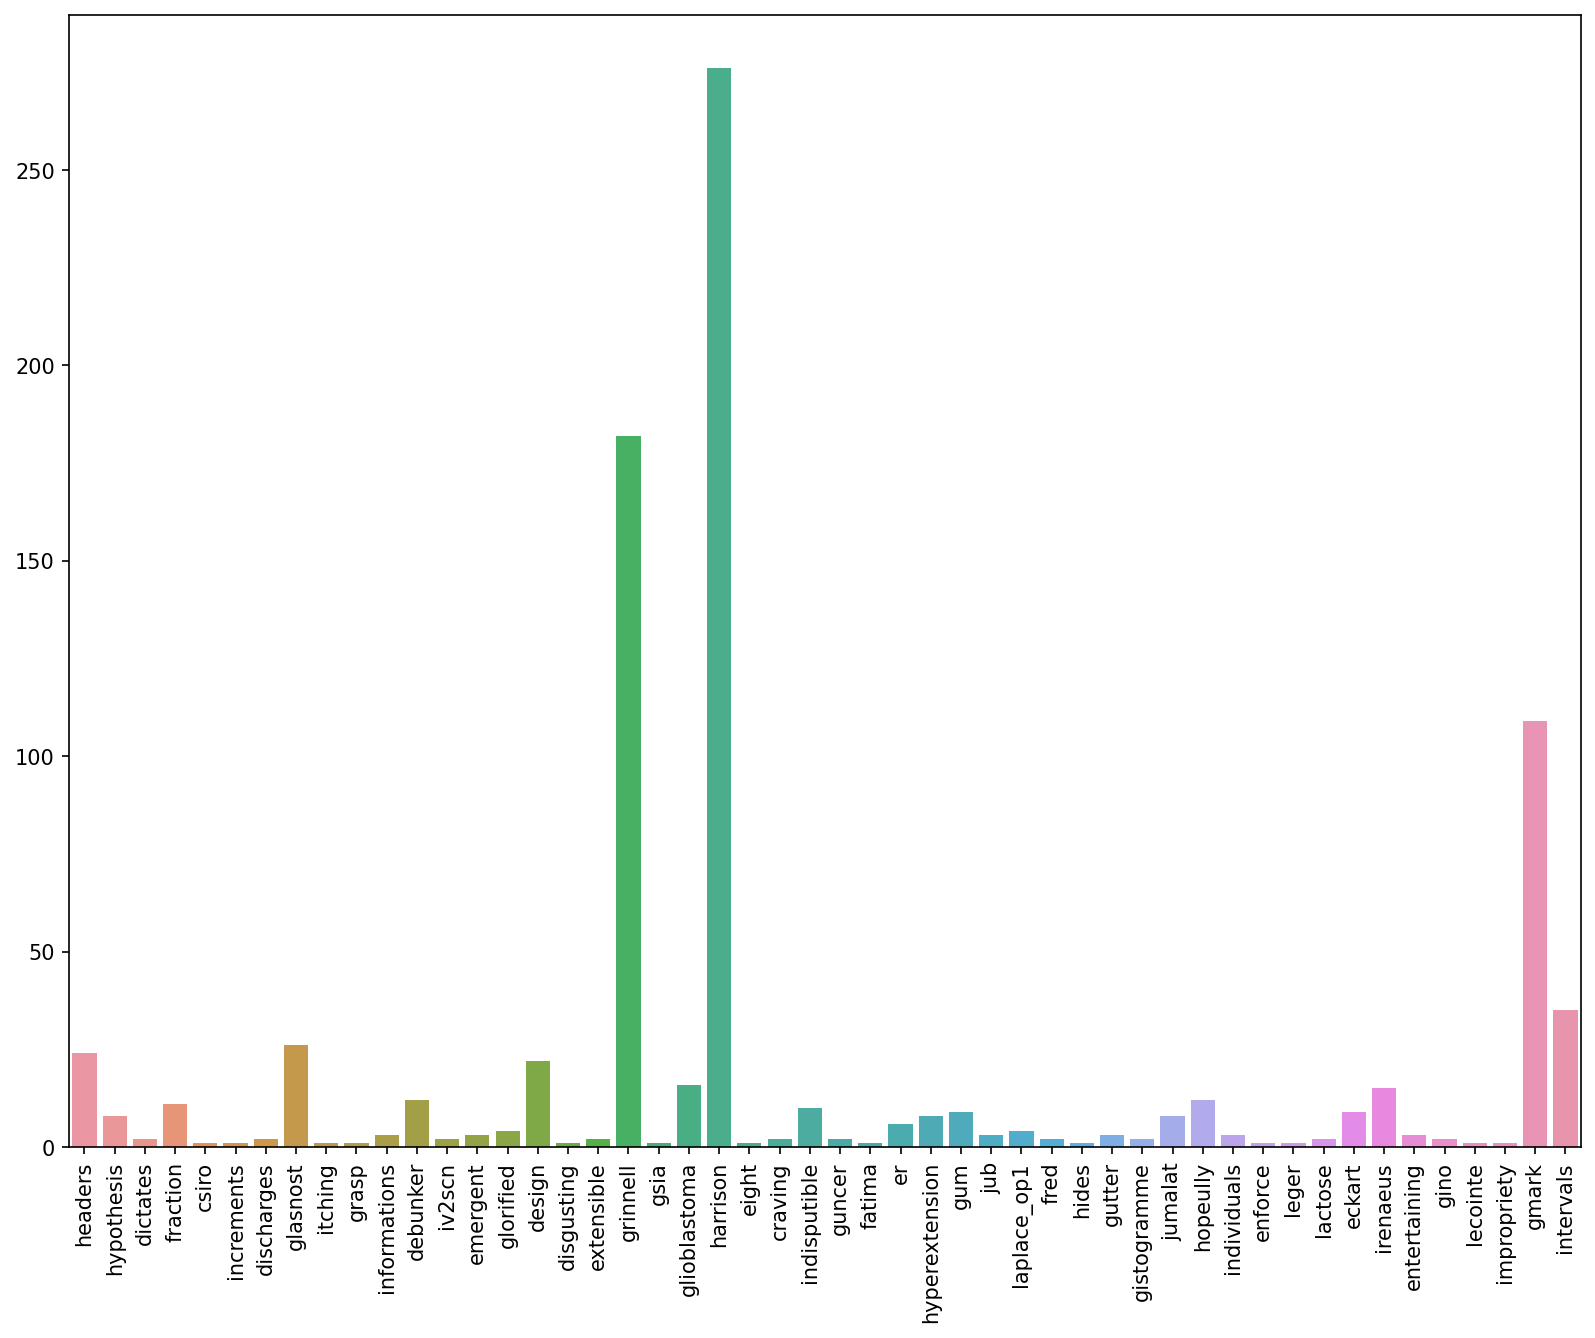

In [105]:
# random data 50 samples from first 10000-20000 and plot only 50
plt.subplots(figsize=(13, 10))
g = sns.barplot(x=np.random.choice(count_vect.get_feature_names()[10000:20000], size=50),
            y=term_frequencies[14000:14050])
for tick in g.get_xticklabels():
    tick.set_rotation(90)

## >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [8]:
# Sort as long tail
# feature creation
# find word frequency
import nltk
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

#feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words = "english")
X_counts = count_vect.fit_transform(X.text)

# convert from sparse array to normal array
X_counts[0:30, 0:100].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [136]:
#dimension reduction
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

#attribute transformation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
#convert to data frame
feature_X = pd.DataFrame(count_vect.get_feature_names()[:]) 
count_X = pd.DataFrame(term_frequencies[:])

#concat table
concat_X=pd.concat([feature_X, count_X], axis=1)
concat_X.columns =['name', 'Count']

#sorting
concat_X = concat_X.sort_values(["Count"], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'edu'),
  Text(1, 0, 'subject'),
  Text(2, 0, 'lines'),
  Text(3, 0, 'god'),
  Text(4, 0, 'organization'),
  Text(5, 0, 'com'),
  Text(6, 0, 'writes'),
  Text(7, 0, 'people'),
  Text(8, 0, 'article'),
  Text(9, 0, 'don'),
  Text(10, 0, 'know'),
  Text(11, 0, 'think'),
  Text(12, 0, 'like'),
  Text(13, 0, 'university'),
  Text(14, 0, 'does'),
  Text(15, 0, 'just'),
  Text(16, 0, 'time'),
  Text(17, 0, 'posting'),
  Text(18, 0, 'say'),
  Text(19, 0, 'jesus'),
  Text(20, 0, 'good'),
  Text(21, 0, 'believe'),
  Text(22, 0, 'use'),
  Text(23, 0, 'host'),
  Text(24, 0, 'cs'),
  Text(25, 0, 'nntp'),
  Text(26, 0, 'way'),
  Text(27, 0, 'new'),
  Text(28, 0, 'world'),
  Text(29, 0, 'graphics'),
  Text(30, 0, 'question'),
  Text(31, 0, 'things'),
  Text(32, 0, 

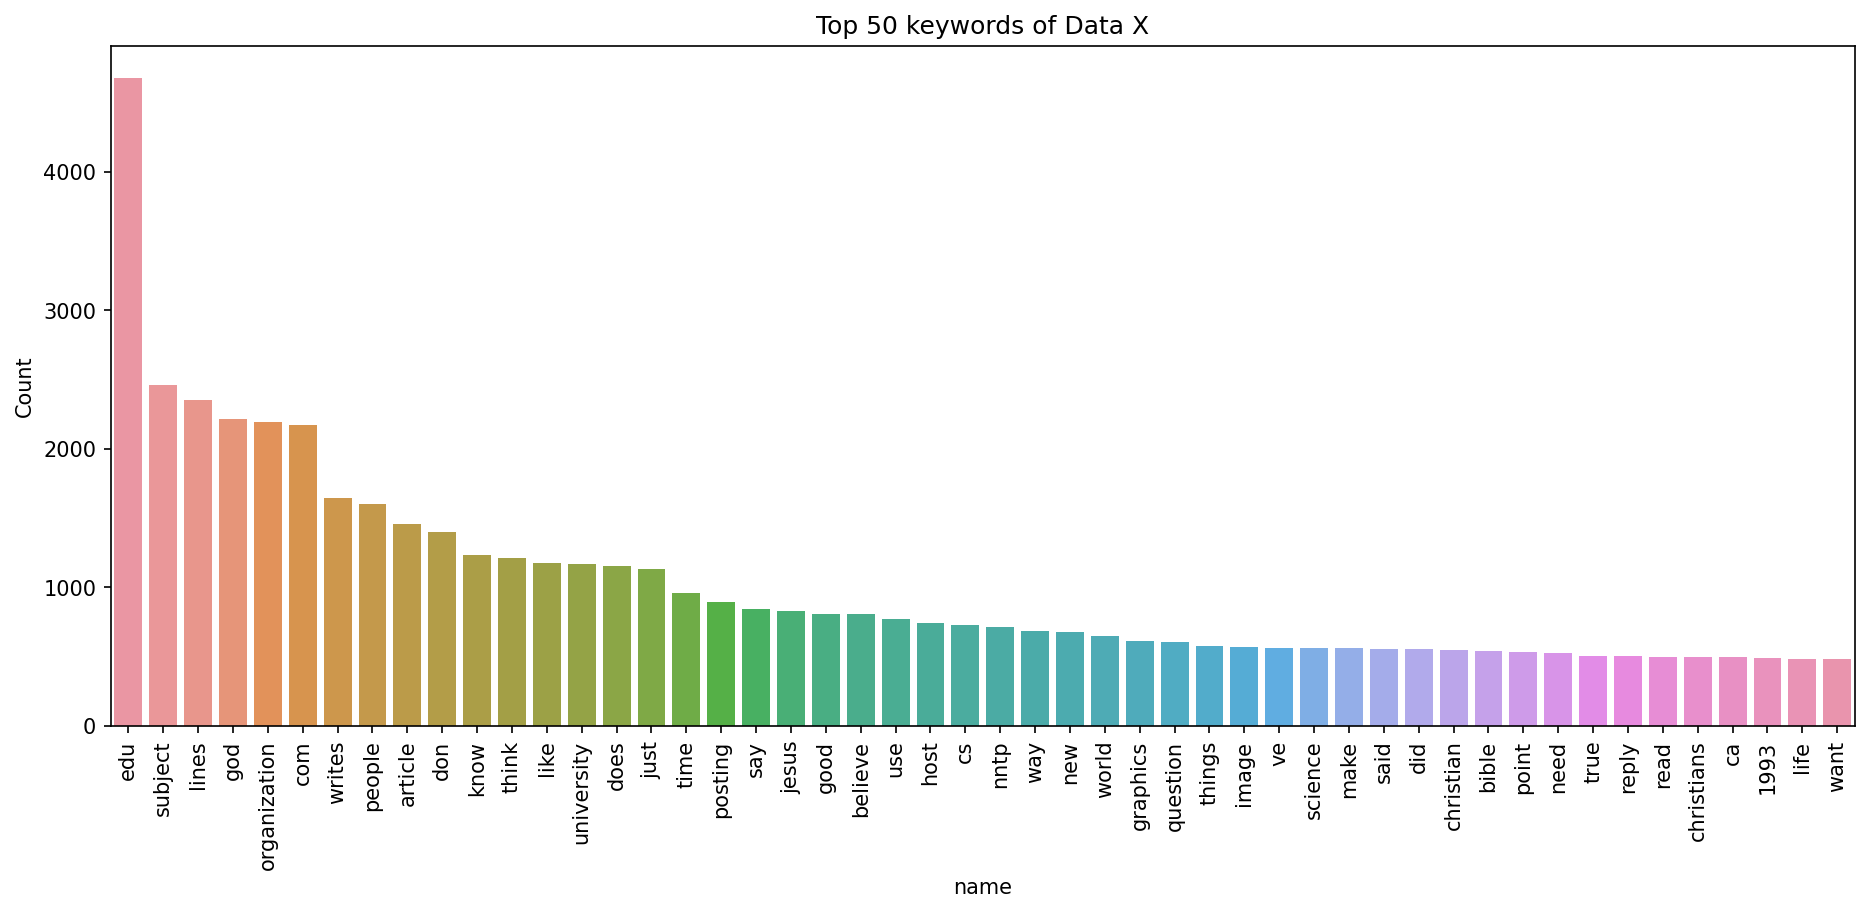

In [119]:
#plot top 50 keywords of data X
plt.figure(figsize=(15, 6))

ax = sns.barplot(y='Count',x='name',data=concat_X.head(50))
ax.set_title('Top 50 keywords of Data X');
plt.xticks(rotation=90)

### 5.6 Discretization and Binarization

In [132]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()

## >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [133]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [134]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [135]:
X

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"
...,...,...,...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med,"[From, :, roos, @, Operoni.Helsinki.FI, (, Chr...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,"[From, :, mhollowa, @, ic.sunysb.edu, (, Micha...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,"[From, :, sasghm, @, theseus.unx.sas.com, (, G...","[0, 0, 1, 0]","[0, 0, 1, 0]"
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,"[From, :, Dan, Wallach, <, dwallach, @, cs.ber...","[0, 0, 1, 0]","[0, 0, 1, 0]"


---
# Part 2

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Adding Column
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Dimensionality Reduction
 - 5.5 Atrribute Transformation / Aggregation
 - 5.6 Discretization and Binarization
6. Data Exploration
7. New Data Visualizations
8. TF-IDF features
9. Naive Bayes classifier & Conclusion

## 1. Data Source
We will explore the Sentiment Labelled Sentences Data Set, originally provided  [here](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). 

Data Set Information:
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015. It contains sentences labelled with positive or negative sentiment.

Format: sentence score
Detials: Score is either 1 (for positive) or 0 (for negative)
The sentences come from three different websites/fields:
imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews.
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Attribute Information:
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

Relevant Papers:
'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Citation Request:
'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

## 2. Data Preparation
import data for 3 files: amazon, imdb, yelp & query data

In [9]:
import pandas as pd
import numpy as np

In [10]:
# import data
import os
amzn = pd.read_table(os.path.expanduser("sentiment labelled sentences/amazon_cells_labelled.txt"))
imdb = pd.read_table(os.path.expanduser("sentiment labelled sentences/imdb_labelled.txt"))
yelp = pd.read_table(os.path.expanduser("sentiment labelled sentences/yelp_labelled.txt"))

# sentiment
sentiment = ['positive', 'negative']

In [11]:
# adding column name to the respective columns
amzn.columns =['sentence', 'score']
imdb.columns =['sentence', 'score']
yelp.columns =['sentence', 'score']

In [12]:
#add column source: websites/fields
amzn['source']='amazon.com'
imdb['source']='imdb.com'
yelp['source']='yelp.com'

In [13]:
# merge 3 text files to 1 files as 'data'
data = amzn.append(imdb).append(yelp)
data

,sentence,score,source
0,"Good case, Excellent value.",1,amazon.com
1,Great for the jawbone.,1,amazon.com
2,Tied to charger for conversations lasting more...,0,amazon.com
3,The mic is great.,1,amazon.com
4,I have to jiggle the plug to get it to line up...,0,amazon.com
...,...,...,...
994,I think food should have flavor and texture an...,0,yelp.com
995,Appetite instantly gone.,0,yelp.com
996,Overall I was not impressed and would not go b...,0,yelp.com
997,"The whole experience was underwhelming, and I ...",0,yelp.com


In [14]:
#add column lenght for counting no. of charactor of each sentence
data["length"]= data["sentence"].str.len()

In [15]:
print(data.sentence[data.score[0]])

1                               Great for the jawbone.
1    Attempting artiness with black & white and cle...
1            Not tasty and the texture was just nasty.
0                          Good case, Excellent value.
0    Not sure who was more lost - the flat characte...
0                                   Crust is not good.
0                          Good case, Excellent value.
0    Not sure who was more lost - the flat characte...
0                                   Crust is not good.
Name: sentence, dtype: object


In [16]:
for t in data["sentence"][:10]:
    print(t)

Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.
I have to jiggle the plug to get it to line up right to get decent volume.
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
If you are Razr owner...you must have this!
Needless to say, I wasted my money.
What a waste of money and time!.
And the sound quality is great.


## 3. Data Transformation

### 3.1 Adding Columns

In [17]:
# my functions
import helpers.data_mining_helpers as dmh

In [18]:
# add column sentiment, if score=1,sentiment=positive, if not, sentiment=negative
data['sentiment'] = np.where(data['score']==1,'positive','negative')

# add length of each sentence
data["length"]= data["sentence"].str.len()

In [19]:
#check
data[0:10]

,sentence,score,source,length,sentiment
0,"Good case, Excellent value.",1,amazon.com,27,positive
1,Great for the jawbone.,1,amazon.com,22,positive
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative
3,The mic is great.,1,amazon.com,17,positive
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74,negative
5,If you have several dozen or several hundred c...,0,amazon.com,111,negative
6,If you are Razr owner...you must have this!,1,amazon.com,43,positive
7,"Needless to say, I wasted my money.",0,amazon.com,35,negative
8,What a waste of money and time!.,0,amazon.com,32,negative
9,And the sound quality is great.,1,amazon.com,31,positive


### 3.2 Familiarizing yourself with the Data

In [20]:
# a simple query
data[0:10][["sentence", "sentiment","source"]]

,sentence,sentiment,source
0,"Good case, Excellent value.",positive,amazon.com
1,Great for the jawbone.,positive,amazon.com
2,Tied to charger for conversations lasting more...,negative,amazon.com
3,The mic is great.,positive,amazon.com
4,I have to jiggle the plug to get it to line up...,negative,amazon.com
5,If you have several dozen or several hundred c...,negative,amazon.com
6,If you are Razr owner...you must have this!,positive,amazon.com
7,"Needless to say, I wasted my money.",negative,amazon.com
8,What a waste of money and time!.,negative,amazon.com
9,And the sound quality is great.,positive,amazon.com


In [21]:
# using loc (by position)
data.iloc[::10, 0:2][0:10]

,sentence,score
0,"Good case, Excellent value.",1
10,He was very impressed when going from the orig...,1
20,I bought this to use with my Kindle Fire and a...,1
30,This product is ideal for people like me whose...,1
40,I was not impressed by this product.,0
50,good protection and does not make phone too bu...,1
60,I really recommend this faceplates since it lo...,1
70,"Even in my BMW 3 series which is fairly quiet,...",0
80,Not a good bargain.,0
90,Made very sturdy.,1


In [22]:
# using loc (by label)
data.loc[::10, 'sentence'][0:10]

0                           Good case, Excellent value.
10    He was very impressed when going from the orig...
20    I bought this to use with my Kindle Fire and a...
30    This product is ideal for people like me whose...
40                 I was not impressed by this product.
50    good protection and does not make phone too bu...
60    I really recommend this faceplates since it lo...
70    Even in my BMW 3 series which is fairly quiet,...
80                                  Not a good bargain.
90                                    Made very sturdy.
Name: sentence, dtype: object

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [23]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source,length,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


### 4.2 Dealing with Duplicate Data

In [24]:
#before remove dup
len(data)

2745

In [25]:
sum(data.duplicated())

17

In [26]:
# check duplicate data in 'sentence', main attribute
sum(data.duplicated('sentence'))

17

In [27]:
# inplace applies changes directly on our dataframe, remove duplicate data
data.drop_duplicates(keep=False, inplace=True)

# check after removing duplicate
len(data)

2711

## 5.  Data Preprocessing

### 5.1 Sampling

In [188]:
data_sample = data.sample(n=1000) #random state

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

positive    1365
negative    1346
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Labelled Sentences'}>

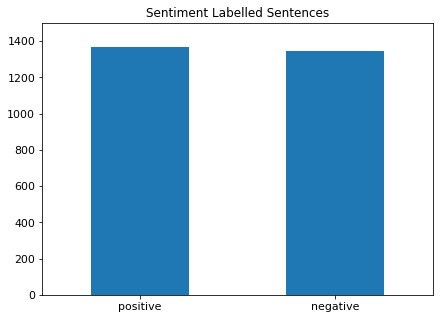

In [190]:
print(data.sentiment.value_counts())

# plot barchart for data
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment Labelled Sentences',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (7,5))

positive    509
negative    491
Name: sentiment, dtype: int64


<AxesSubplot:title={'center':'Sentiment Labelled Sentences'}>

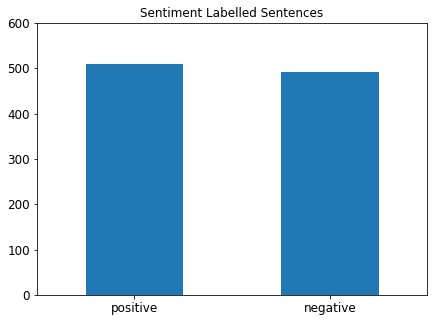

In [191]:
print(data_sample.sentiment.value_counts())

# plot barchart for data_sample
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment Labelled Sentences',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (7,5))

Side-by-side comparison of the sentiment distribution between 2 data; raw data & sample data

positive    1365
negative    1346
Name: sentiment, dtype: int64
positive    509
negative    491
Name: sentiment, dtype: int64


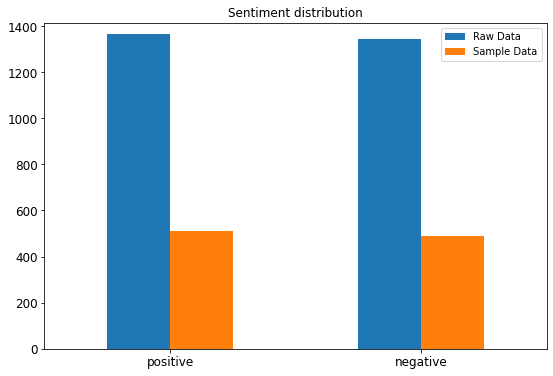

In [192]:
# Upper bound
upper_bound = max(data.sentiment.value_counts()) + 50

# print data
print(data.sentiment.value_counts())
print(data_sample.sentiment.value_counts())

# plot barchart
df = pd.DataFrame({'Raw Data': data.sentiment.value_counts(),
                   'Sample Data': data_sample.sentiment.value_counts()})
ax = df.plot.bar(title = 'Sentiment distribution',
                 ylim = [0, upper_bound],rot = 0, fontsize = 12,
                 figsize = (9,6))

### 5.2 Feature Creation
Using NLTK library which is a natural language processing tool used for text mining tasks

In [193]:
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [194]:
data[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [195]:
data[0:4]

,sentence,score,source,length,sentiment,unigrams
0,"Good case, Excellent value.",1,amazon.com,27,positive,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon.com,22,positive,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon.com,17,positive,"[The, mic, is, great, .]"


In [196]:
list(data[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

### 5.3 Feature subset selection
Generate a document-term matrix from the original dataset.

In [197]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

In [200]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(data[0:1].sentence)))

['good', 'case', 'excellent', 'value']

In [202]:
# we convert from sparse array to normal array
data_counts[0:, 0:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [203]:
# finding which #sentence and term (#word) has correlation
maxx =np.argwhere(data_counts[0:,0:]>3)
print(maxx)

[[   4 4603]
 [  63 4525]
 [ 158 4525]
 [ 624 4525]
 [ 642 4525]
 [ 706 2977]
 [ 712 4525]
 [ 816 4525]
 [ 914  215]
 [ 997  213]
 [ 997  215]
 [ 997  272]
 [ 997  296]
 [ 997  636]
 [ 997 1581]
 [ 997 1737]
 [ 997 1824]
 [ 997 1878]
 [ 997 1916]
 [ 997 1988]
 [ 997 2309]
 [ 997 2422]
 [ 997 2427]
 [ 997 2488]
 [ 997 2643]
 [ 997 2931]
 [ 997 2949]
 [ 997 3058]
 [ 997 3092]
 [ 997 3117]
 [ 997 3119]
 [ 997 3123]
 [ 997 3139]
 [ 997 3154]
 [ 997 3914]
 [ 997 4523]
 [ 997 4525]
 [ 997 4539]
 [ 997 4542]
 [ 997 4552]
 [ 997 4603]
 [ 997 4636]
 [ 997 4884]
 [ 997 4962]
 [ 997 5063]
 [1037 4525]
 [1111 1737]
 [1111 2422]
 [1111 2427]
 [1111 2949]
 [1111 3092]
 [1111 4525]
 [1111 4552]
 [1112   75]
 [1112  116]
 [1112  178]
 [1112  213]
 [1112  215]
 [1112  272]
 [1112  296]
 [1112  372]
 [1112  415]
 [1112  636]
 [1112  645]
 [1112  672]
 [1112 1284]
 [1112 1575]
 [1112 1585]
 [1112 1598]
 [1112 1737]
 [1112 1742]
 [1112 1824]
 [1112 1988]
 [1112 2018]
 [1112 2108]
 [1112 2117]
 [1112 2180]

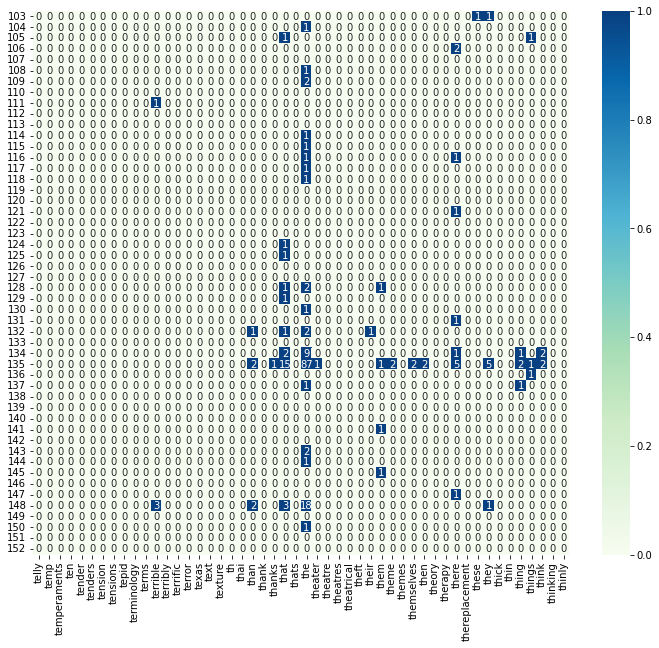

In [204]:
#get features first (term#4500-4550)
plot_a = [str(i) for i in count_vect.get_feature_names()[4500:4550]]

# obtain sentence (1080-1130)
plot_b = [str(i) for i in list(data.index)[1080:1130]]

plot_c = data_counts[1080:1130, 4500:4550].toarray()

#plot
import seaborn as sns

df_todraw = pd.DataFrame(plot_c, columns = plot_a, index = plot_b)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="GnBu",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [205]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

(2711, 2)

In [206]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(data['sentence'])
print(tfidf_matrix.toarray())

# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine score
score = cosine_similarity(tfidf_matrix)
# Print the cosine score
score
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

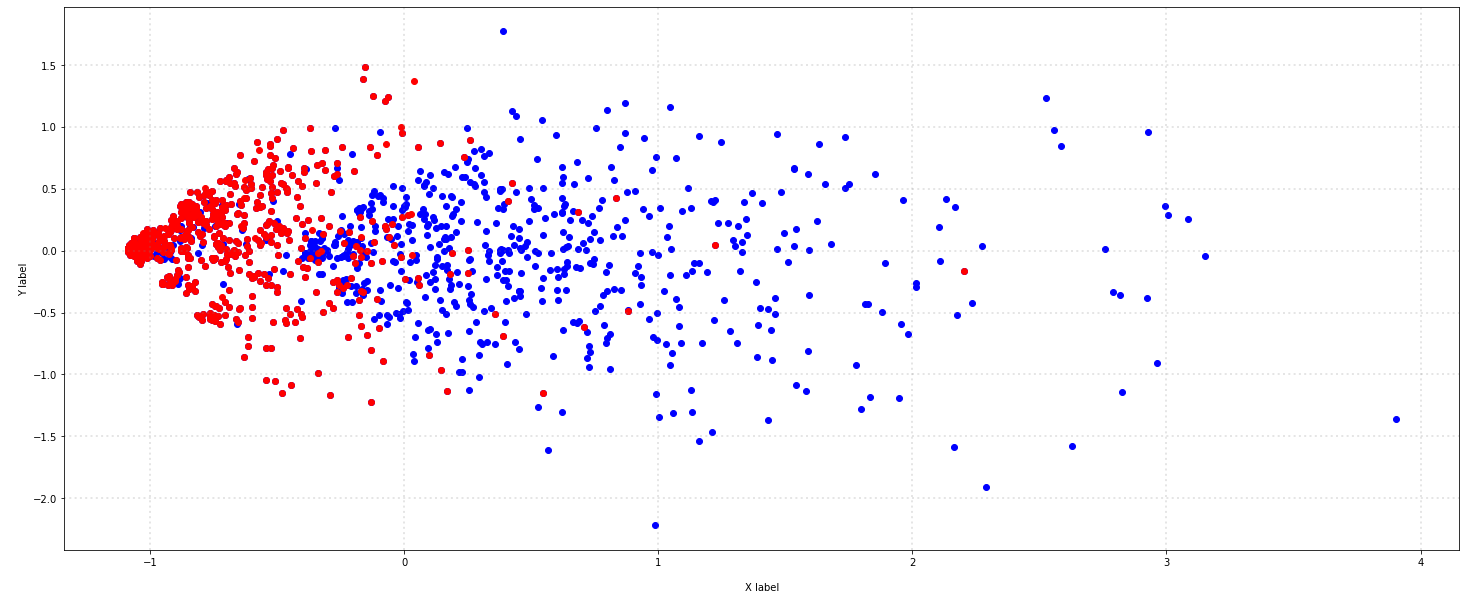

In [207]:
col = ['blue', 'red']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, d in zip(col, score):
    xs = data_reduced[data['score'] == d].T[0]
    ys = data_reduced[data['score'] == d].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX label')
ax.set_ylabel('\nY label')

plt.show()

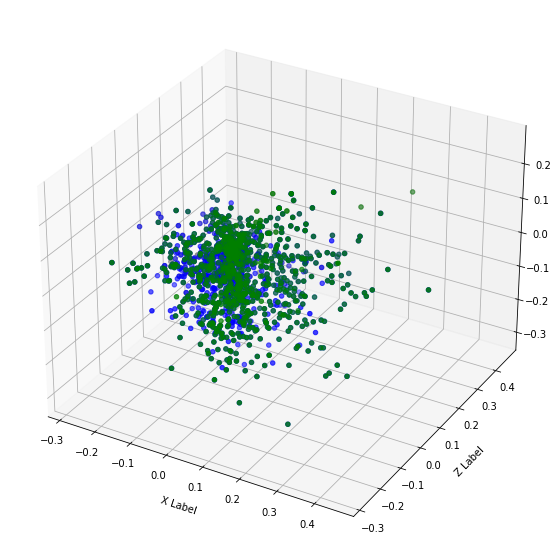

In [208]:
# pca transformation to 3D
data_3d = PCA(n_components = 3).fit_transform(tfidf_matrix.toarray())
col = ['blue','grey','green']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for c, x in zip(col, score):
    xs = data_3d[data['score'] == x].T[0]
    ys = data_3d[data['score'] == x].T[1]
    zs = data_3d[data['score'] == x].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_ylabel('\nZ Label')

plt.show()

### 5.5 Atrribute Transformation / Aggregation
Generating a simple distribution of the words found in all the entire set of articles.

In [225]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies_data = []
for j in range(0,data_counts.shape[1]):
    term_frequencies_data.append(sum(data_counts[:,j].toarray()))
    
term_frequencies_data = np.asarray(data_counts.sum(axis=0))[0]

[Text(0, 0, 'type'),
 Text(1, 0, 'typical'),
 Text(2, 0, 'ue'),
 Text(3, 0, 'ugliest'),
 Text(4, 0, 'ugly'),
 Text(5, 0, 'uhura'),
 Text(6, 0, 'ultra'),
 Text(7, 0, 'um'),
 Text(8, 0, 'unacceptable'),
 Text(9, 0, 'unacceptible'),
 Text(10, 0, 'unaccompanied'),
 Text(11, 0, 'unbearable'),
 Text(12, 0, 'unbearably'),
 Text(13, 0, 'unbelievable'),
 Text(14, 0, 'unbelievably'),
 Text(15, 0, 'uncalled'),
 Text(16, 0, 'uncomfortable'),
 Text(17, 0, 'unconditional'),
 Text(18, 0, 'unconvincing'),
 Text(19, 0, 'underacting'),
 Text(20, 0, 'underappreciated'),
 Text(21, 0, 'underbite'),
 Text(22, 0, 'undercooked'),
 Text(23, 0, 'underlines'),
 Text(24, 0, 'underlying'),
 Text(25, 0, 'underneath'),
 Text(26, 0, 'underrated'),
 Text(27, 0, 'understand'),
 Text(28, 0, 'understanding'),
 Text(29, 0, 'understated'),
 Text(30, 0, 'understatement'),
 Text(31, 0, 'understood'),
 Text(32, 0, 'undertone'),
 Text(33, 0, 'underwater'),
 Text(34, 0, 'underwhelming'),
 Text(35, 0, 'undoubtedly'),
 Text(36, 0

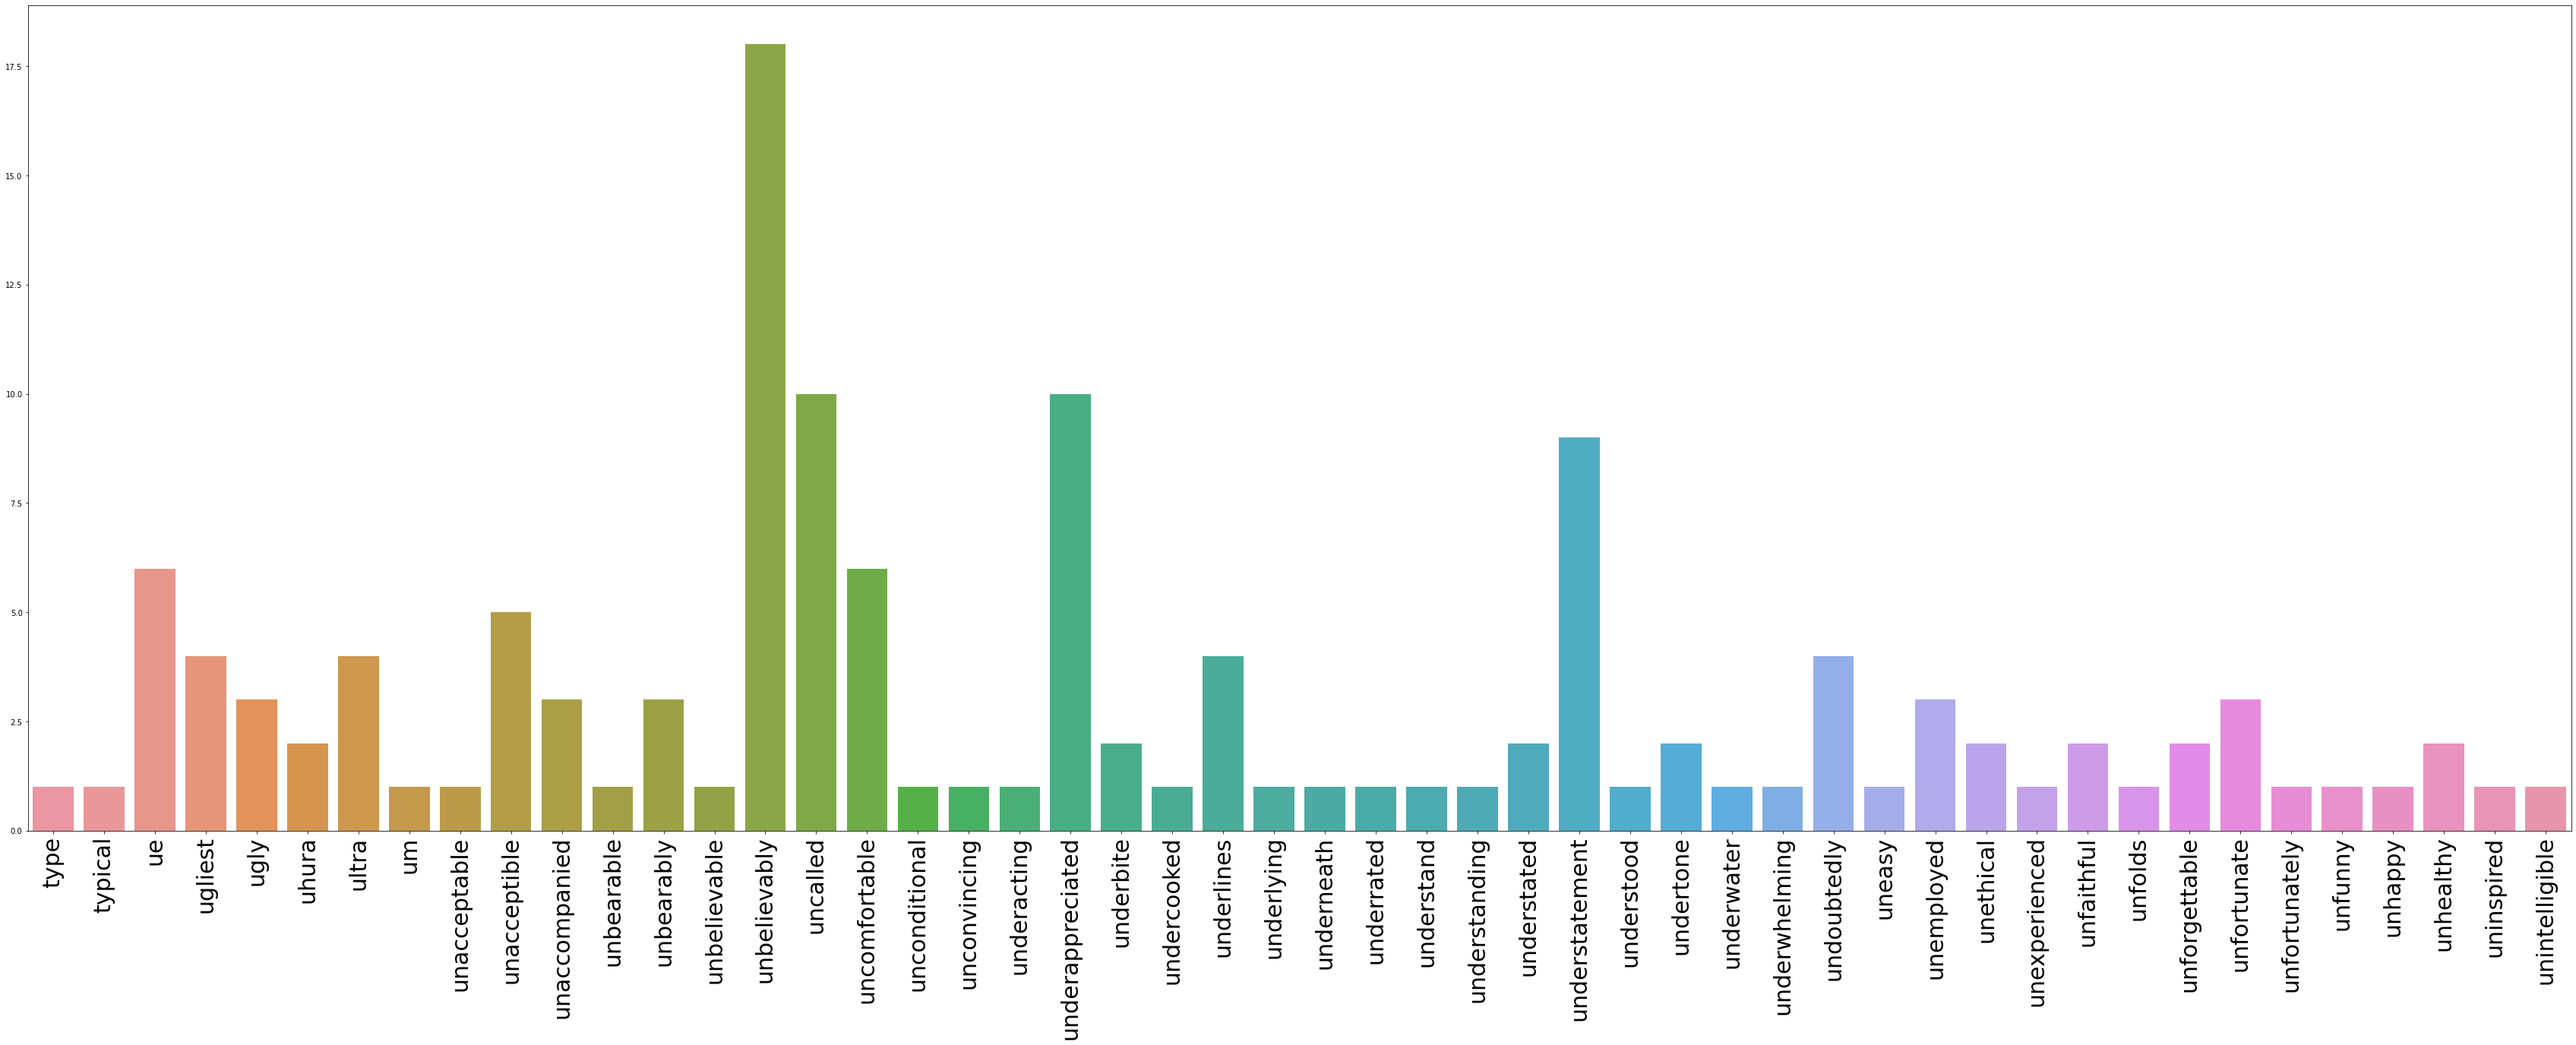

In [227]:
#using matplotlib
#%matplotlib notebook
#set up size
plt.subplots(figsize=(60, 20))
g = sns.barplot(x=count_vect.get_feature_names()[4500:4550], 
                y=term_frequencies_data[1080:1130])
g.set_xticklabels(count_vect_data.get_feature_names()[4500:4550], rotation = 90, fontsize = 30)

### Create Long Tail Graph

In [228]:
import nltk
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

#feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect_data = CountVectorizer(stop_words = "english")
data_counts = count_vect_data.fit_transform(data.sentence)

# convert from sparse array to normal array
data_counts[0:30, 0:100].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [229]:
#dimension reduction
from sklearn.decomposition import PCA

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

#attribute transformation
term_frequencies_data = []
for j in range(0,data_counts.shape[1]):
    term_frequencies_data.append(sum(data_counts[:,j].toarray()))
    
#convert to data frame
feature_data = pd.DataFrame(count_vect_data.get_feature_names()[:]) 
count_data = pd.DataFrame(term_frequencies_data[:])

#concat table
concat_data=pd.concat([feature_data, count_data], axis=1)
concat_data.columns =['name', 'Count']

#sorting
concat_data = concat_data.sort_values(["Count"], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'good'),
  Text(1, 0, 'great'),
  Text(2, 0, 'movie'),
  Text(3, 0, 'film'),
  Text(4, 0, 'phone'),
  Text(5, 0, 'food'),
  Text(6, 0, 'like'),
  Text(7, 0, 'just'),
  Text(8, 0, 'time'),
  Text(9, 0, 'place'),
  Text(10, 0, 'service'),
  Text(11, 0, 'bad'),
  Text(12, 0, 'really'),
  Text(13, 0, 'best'),
  Text(14, 0, 'don'),
  Text(15, 0, 'quality'),
  Text(16, 0, 've'),
  Text(17, 0, 'love'),
  Text(18, 0, 'work'),
  Text(19, 0, 'better'),
  Text(20, 0, 'nice'),
  Text(21, 0, 'product'),
  Text(22, 0, 'excellent'),
  Text(23, 0, 'sound'),
  Text(24, 0, 'use'),
  Text(25, 0, 'works'),
  Text(26, 0, 'did'),
  Text(27, 0, 'recommend'),
  Text(28, 0, 'headset'),
  Text(29, 0, 'think'),
  Text(30, 0, 'battery'),
  Text(31, 0, 'way'),
  Text(32, 0, 'pret

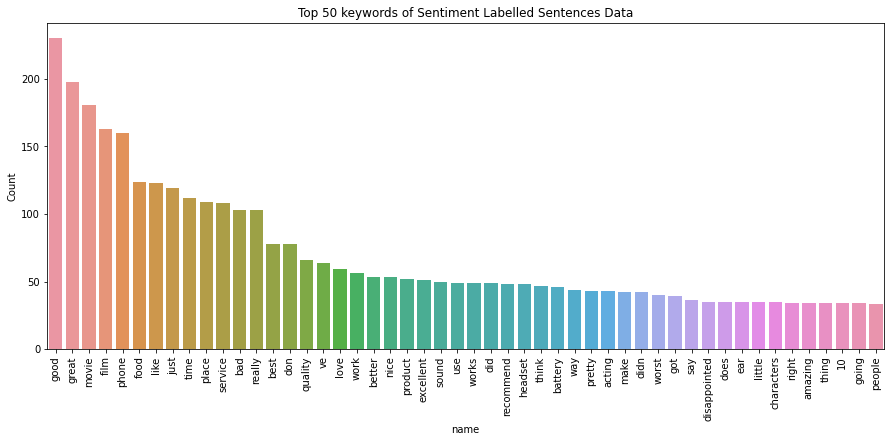

In [233]:
#plot top 50 keywords of Data
plt.figure(figsize=(15, 6))

ax = sns.barplot(y='Count',x='name',data=concat_data.head(50))
ax.set_title('Top 50 keywords of Sentiment Labelled Sentences Data');
plt.xticks(rotation=90)

### 5.6 Discretization and Binarization

In [234]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.source)
mlb.classes_
data['bin_source'] = mlb.transform(data['source']).tolist()

In [235]:
data[0:9]

,sentence,score,source,length,sentiment,unigrams,bin_source
0,"Good case, Excellent value.",1,amazon.com,27,positive,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
1,Great for the jawbone.,1,amazon.com,22,positive,"[Great, for, the, jawbone, .]","[1, 0, 0]"
2,Tied to charger for conversations lasting more...,0,amazon.com,79,negative,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
3,The mic is great.,1,amazon.com,17,positive,"[The, mic, is, great, .]","[1, 0, 0]"
4,I have to jiggle the plug to get it to line up...,0,amazon.com,74,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
5,If you have several dozen or several hundred c...,0,amazon.com,111,negative,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
6,If you are Razr owner...you must have this!,1,amazon.com,43,positive,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
7,"Needless to say, I wasted my money.",0,amazon.com,35,negative,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
8,What a waste of money and time!.,0,amazon.com,32,negative,"[What, a, waste, of, money, and, time, !, .]","[1, 0, 0]"


# 6. Data Exploration

In [236]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [237]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
['Definitely a bargain.']
['I had absolutely no problem with this headset linking to my 8530 Blackberry Curve!']


In [238]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [239]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---
# Part 3

# 7. New Data Visualizations
Generate meaningful new data visualizations.

Plot Word Cloud for exploring the frequency Words of each type of sentiment sentences

In [246]:
#create positive/negative data
data_pos = data[data.sentiment == 'positive']
data_neg = data[data.sentiment == 'negative']

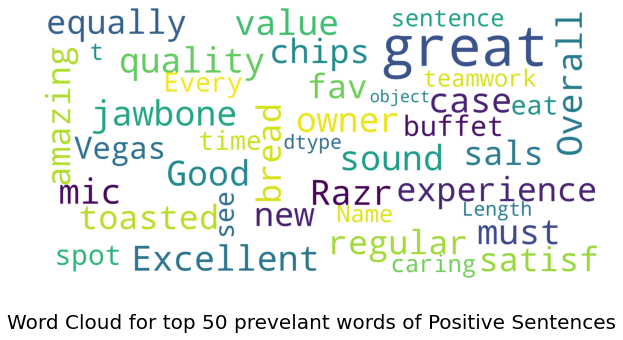

In [250]:
#plot word cloud for Positive sentence
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data_pos['sentence']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words of Positive Sentences', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

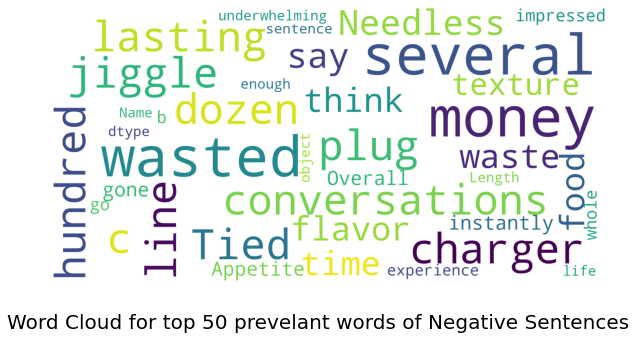

In [251]:
#plot word cloud for Negative sentence
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(data_neg['sentence']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words of Negative Sentences', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

Side-by-side comparison of the distribution between 2 sentiments of each source (amazon, imdb, yelp)

source      sentiment
amazon.com  negative     493
            positive     486
imdb.com    positive     382
            negative     359
yelp.com    positive     497
            negative     494
Name: sentiment, dtype: int64


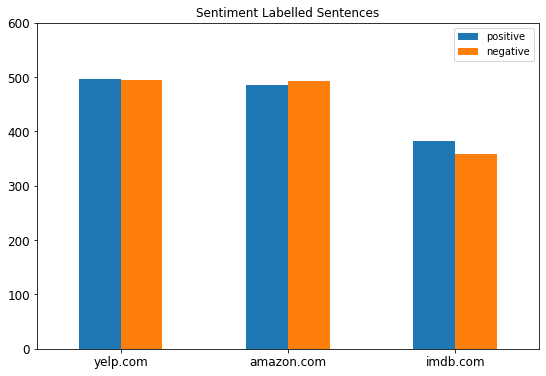

In [240]:
# summarize data, group by each source and count by sentiment
x = data.groupby('source')['sentiment'].value_counts()
print(x)

# create 2 data; positive and negative
positive = data[data['sentiment'] == 'positive']
negative = data[data['sentiment'] == 'negative']

for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
        
# plot barchart
df = pd.DataFrame({'positive': positive.source.value_counts(),
                   'negative': negative.source.value_counts()})
ax = df.plot.bar(title = 'Sentiment Labelled Sentences',
                 ylim = [0, 600],rot = 0, fontsize = 12,
                 figsize = (9,6))


# 8. TF-IDF features
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [264]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(data['sentence'])
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [265]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine score
score = cosine_similarity(tfidf_matrix)
# Print the cosine score
score
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

In [266]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine score
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
# Print the cosine score
cosine_sim
# cosine score of pair document, in NLP value is (0,1)
# highest similarity score=1 of that keyword with other keyword of all document

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.05207178, ..., 0.        , 0.01722983,
        0.03841247],
       [0.        , 0.05207178, 1.        , ..., 0.        , 0.01523449,
        0.01132134],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12092689,
        0.        ],
       [0.        , 0.01722983, 0.01523449, ..., 0.12092689, 1.        ,
        0.05913298],
       [0.        , 0.03841247, 0.01132134, ..., 0.        , 0.05913298,
        1.        ]])

# 9. Naive Bayes classifier
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

In [267]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [268]:
#Model 1, prepare performance evaluation from data counts, train size=0.8, test size=0.2
a_train1, a_test1, b_train1, b_test1 = train_test_split(data_counts, data.score, test_size=0.2)

model_counts = MultinomialNB()
model_counts.fit(a_train1, b_train1)

MultinomialNB()

In [269]:
#Model 1, Accuracy score
model_counts.score(a_test1, b_test1)

0.7790055248618785

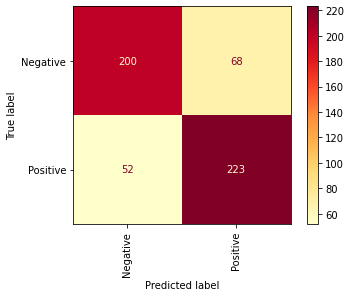

In [270]:
plot_confusion_matrix(model_counts, a_test1, b_test1, display_labels=['Negative', 'Positive'], cmap="YlOrRd", xticks_rotation='vertical')

In [271]:
#Model 2, performance evaluation from tfidf matrix, train size=0.8, test size=0.2
a_train2, a_test2, b_train2, b_test2 = train_test_split(tfidf_matrix, data.score, test_size=0.2)

model_tfidf = MultinomialNB()
model_tfidf.fit(a_train2, b_train2)

MultinomialNB()

In [272]:
model_tfidf.score(a_test2, b_test2)

0.8084714548802947

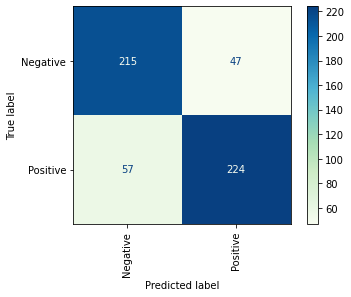

In [273]:
plot_confusion_matrix(model_tfidf, a_test2, b_test2, display_labels=['Negative', 'Positive'], cmap='GnBu', xticks_rotation='vertical')

# Conclusion
Comparing 2 models from using Naive Bayes classifier
Data: Train size = 0.8, Test size = 0.2
1. Model 1: data_counts which is term-document matrix
2. Model 2: TD-IDF features

Found that the accuracy rate of Model 2 as 0.80 > Model 1 as 0.78

From metrics for performance evalution, Model 2 has True Positive & True Negative more than Model 1

---
# Part 4
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

In my opinion, I think we should improve the parts as below.
1. Data Preprocessing
Need to clean data more, good for the model to analyze the data. For example,
- Convert contraction word e.g. I'm -> I am, It's -> It is
- Remove stop words e.g. a, and, the. Because these words appear a lot, it might mislead the meaning of the sentence.
- Remove number
- Replace n't with not. For handling negative cases e.g. can't -> can not, don't -> do not
- Remove White space by striping text
- Convert Upper case to Lower case. Because the machine treats the upper case and lower case as a different word
- Remove some special characters, because it's no meaning e.g. !,*)@#%(&$_.^+->:;/\|•«\n
- Correct misspelling word

2. EDA: Exploratory Data Analysis
- do more visualization data for finding the insight or the issue of data e.g. Word cloud, Pie-chart, Graph for seeing the distribution of data and might found a biased data, then can fix the issues.

3. Prediction Model
- Maybe try other models, then compare the accuracy, also consider confusion matrix, Recall, Precision, and F1-score for analyzing in order to improve the accuracy of the model